In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load crime data
conn_crime = sqlite3.connect('data/crime_data.db')
crime_data = pd.read_sql_query("SELECT * FROM crime_data", conn_crime)
conn_crime.close()

# Load arrest data
conn_arrest = sqlite3.connect('data/arrest_data.db')
arrest_data = pd.read_sql_query("SELECT * FROM arrest_data", conn_arrest)
conn_arrest.close()


crime_counts = crime_data.groupby('AREA NAME').size().reset_index(name='Crime Reports')
arrest_counts = arrest_data.groupby('Area Name').size().reset_index(name='Arrests')

# Merge crime and arrest data on area name
merged_data = pd.merge(crime_counts, arrest_counts, left_on='AREA NAME', right_on='Area Name', how='outer').fillna(0)
merged_data['Disparity'] = merged_data['Crime Reports'] - merged_data['Arrests']


In [8]:
df = crime_data

df1 = arrest_data

In [9]:
df.head(5)

,Crm Cd Desc,Date Rptd,Vict Sex,LOCATION,AREA NAME,DR_NO
0,VEHICLE - STOLEN,03/01/2020 12:00:00 AM,M,1900 S LONGWOOD AV,Wilshire,190326475
1,BURGLARY FROM VEHICLE,02/09/2020 12:00:00 AM,M,1000 S FLOWER ST,Central,200106753
2,BIKE - STOLEN,11/11/2020 12:00:00 AM,X,1400 W 37TH ST,Southwest,200320258
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),05/10/2023 12:00:00 AM,M,14000 RIVERSIDE DR,Van Nuys,200907217
4,VEHICLE - STOLEN,09/09/2020 12:00:00 AM,None,200 E AVENUE 28,Hollenbeck,200412582


In [10]:
df1.head(5)

,Charge,Arrest Date,Arrest Type Code,Charge Description,Location,Area Name,Report ID
0,647(B)PC,07/14/2023 12:00:00 AM,M,PROSTITUTION,POINT (-118.3091 34.0845),Hollywood,230612568
1,10851(A)VC,11/10/2023 12:00:00 AM,M,TAKE VEHICLE W/O OWNER'S CONSENT,POINT (-118.4032 34.0475),West LA,230801062
2,41.18ALAMC,09/08/2023 12:00:00 AM,M,LOITER/OBSTRUCT STREET/SIDEWALK/ETC,POINT (-118.5976 34.2414),Devonshire,231715221
3,459.5PC,07/14/2023 12:00:00 AM,M,SHOPLIFTING,POINT (-118.3563 34.0736),Wilshire,230712023
4,29800(A)1PC,07/15/2023 12:00:00 AM,F,POSS F/ARM BY CONVICTED FELON/ADDICT/ETC,POINT (-118.3866 34.1922),N Hollywood,6641569


In [11]:
df.columns

Index(['Crm Cd Desc', 'Date Rptd', 'Vict Sex', 'LOCATION', 'AREA NAME',
       'DR_NO'],
      dtype='object')

In [12]:
df1.columns

Index(['Charge', 'Arrest Date', 'Arrest Type Code', 'Charge Description',
       'Location', 'Area Name', 'Report ID'],
      dtype='object')

In [13]:
df.describe()

,DR_NO
count,1.004681e+06
mean,2.202119e+08
std,1.318332e+07
min,8.170000e+02
25%,2.106168e+08
50%,2.209157e+08
75%,2.311100e+08
max,2.521040e+08


In [14]:
df1.describe()

,Report ID
count,2.993630e+05
mean,3.886316e+07
std,7.720198e+07
min,1.062984e+06
25%,6.191008e+06
50%,6.504310e+06
75%,6.822072e+06
max,2.515041e+08


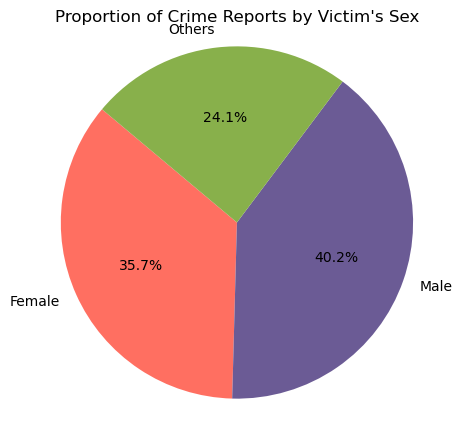

In [15]:
# Group Victim's Sex into three categories: Male, Female, and Others
crime_data['Vict Sex'] = crime_data['Vict Sex'].replace({'M': 'Male', 'F': 'Female'})
crime_data['Vict Sex'] = crime_data['Vict Sex'].apply(lambda x: x if x in ['Male', 'Female'] else 'Others')


vict_sex_counts = crime_data.groupby('Vict Sex').size().reset_index(name='Count')


plt.figure(figsize=(5, 5))
plt.pie(vict_sex_counts['Count'], labels=vict_sex_counts['Vict Sex'], autopct='%1.1f%%', startangle=140, colors=['#FF6F61', '#6B5B95', '#88B04B'])
plt.title('Proportion of Crime Reports by Victim\'s Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('Crm Report by Vict Sex')
plt.show()


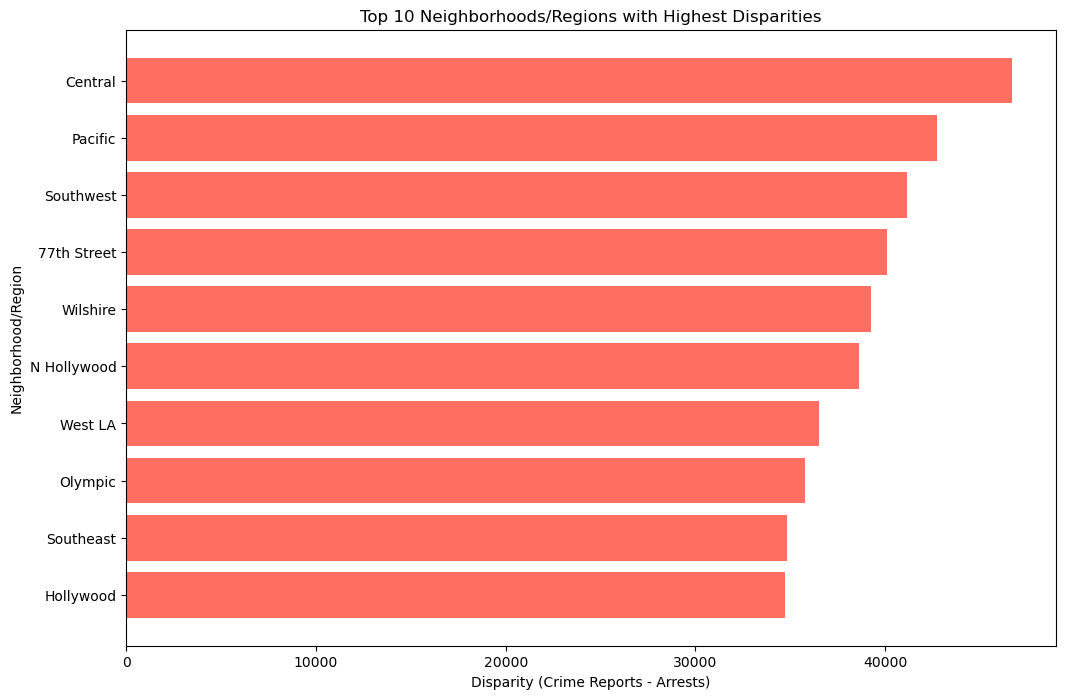

In [16]:
# Top 10 Areas with Highest Disparity
top_10_disparity = merged_data.sort_values(by='Disparity', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_disparity['AREA NAME'], top_10_disparity['Disparity'], color='#FF6F61')
plt.xlabel('Disparity (Crime Reports - Arrests)')
plt.ylabel('Neighborhood/Region')
plt.title('Top 10 Neighborhoods/Regions with Highest Disparities')
plt.gca().invert_yaxis()
plt.savefig('Top 10 higest disparities')
plt.show()

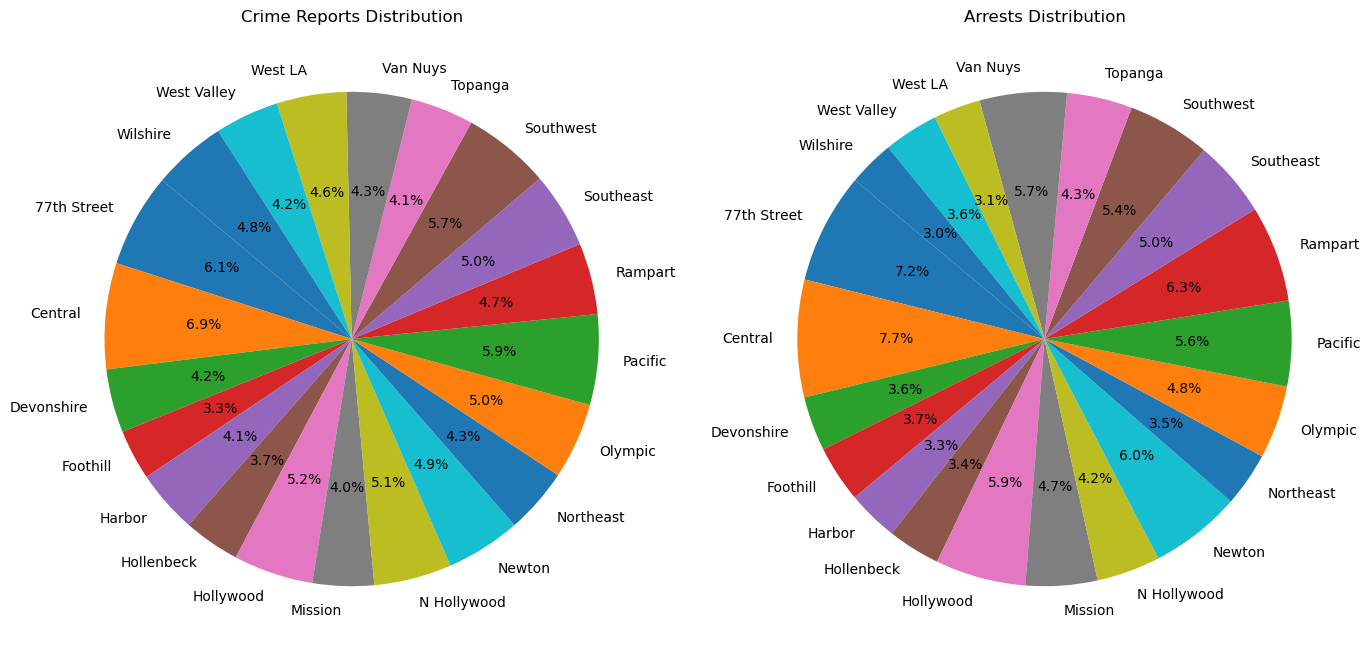

In [17]:
# Distribution of Crime Reports and Arrests
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(merged_data['Crime Reports'], labels=merged_data['AREA NAME'], autopct='%1.1f%%', startangle=140)
plt.title('Crime Reports Distribution')
plt.subplot(1, 2, 2)
plt.pie(merged_data['Arrests'], labels=merged_data['Area Name'], autopct='%1.1f%%', startangle=140)
plt.title('Arrests Distribution')
plt.tight_layout()
plt.savefig('Pie Chart')
plt.show()

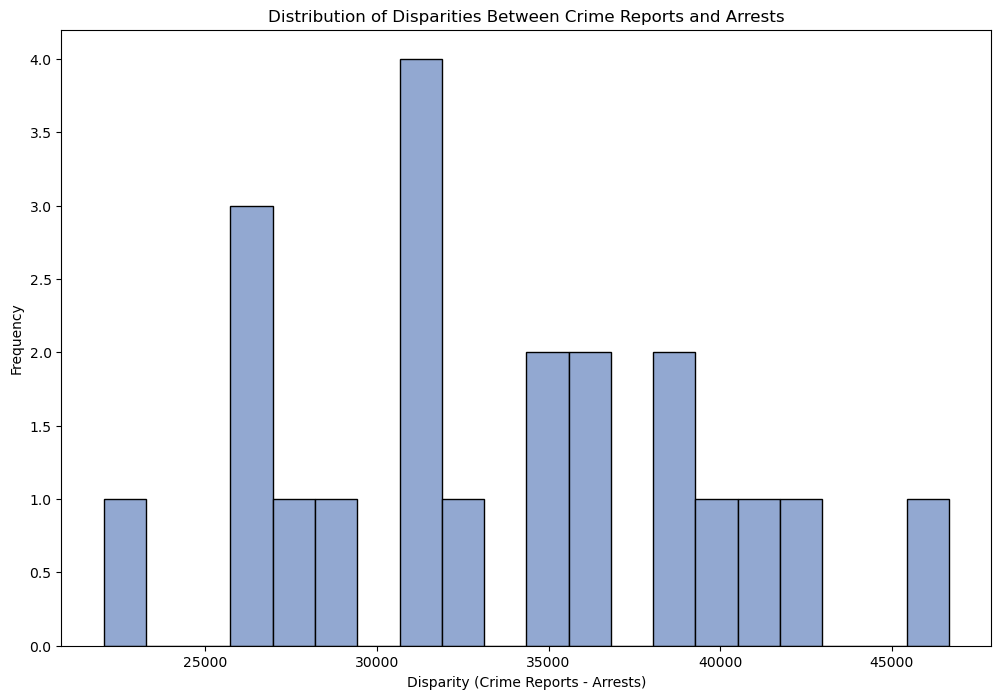

In [18]:
# Distribution of Disparities
plt.figure(figsize=(12, 8))
plt.hist(merged_data['Disparity'], bins=20, color='#92A8D1', edgecolor='black')
plt.xlabel('Disparity (Crime Reports - Arrests)')
plt.ylabel('Frequency')
plt.title('Distribution of Disparities Between Crime Reports and Arrests')
plt.savefig('Distribution')
plt.show()

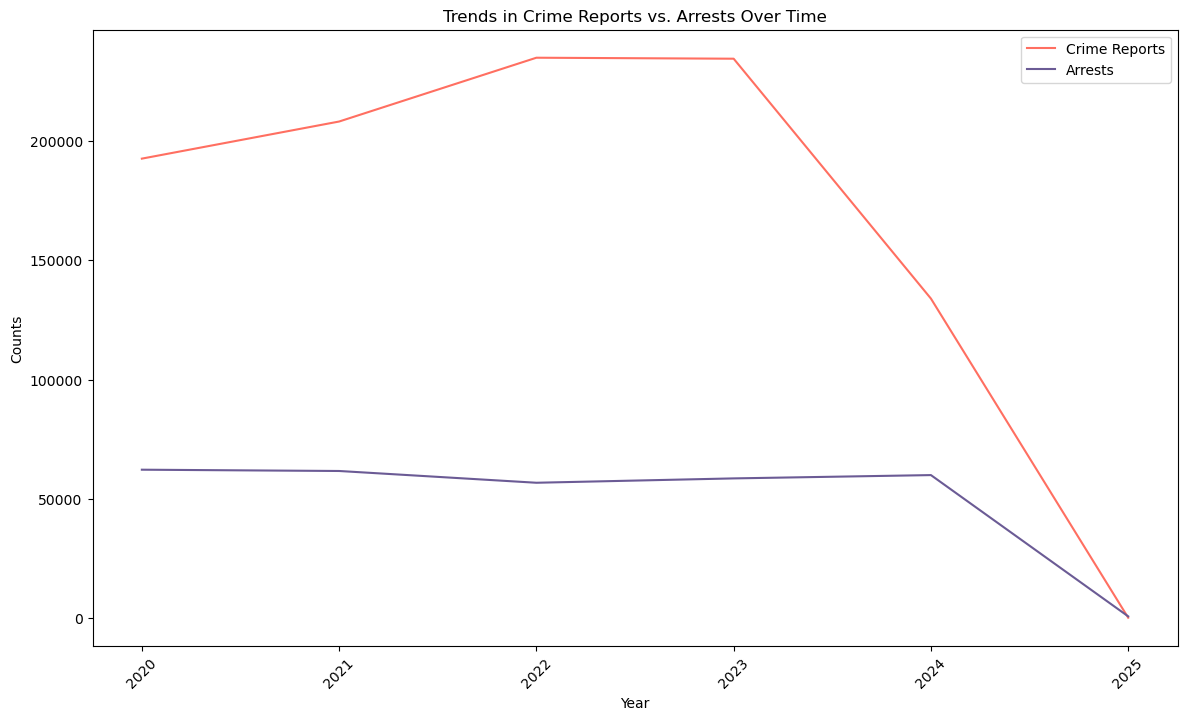

In [20]:
# Trends in Crime Reports vs. Arrests Over Time
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
arrest_data['Arrest Date'] = pd.to_datetime(arrest_data['Arrest Date'])
crime_trend = crime_data.groupby(crime_data['Date Rptd'].dt.to_period('Y')).size().reset_index(name='Crime Reports')
arrest_trend = arrest_data.groupby(arrest_data['Arrest Date'].dt.to_period('Y')).size().reset_index(name='Arrests')

plt.figure(figsize=(14, 8))
plt.plot(crime_trend['Date Rptd'].astype(str), crime_trend['Crime Reports'], color='#FF6F61', label='Crime Reports')
plt.plot(arrest_trend['Arrest Date'].astype(str), arrest_trend['Arrests'], color='#6B5B95', label='Arrests')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Trends in Crime Reports vs. Arrests Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Trends')
plt.show()

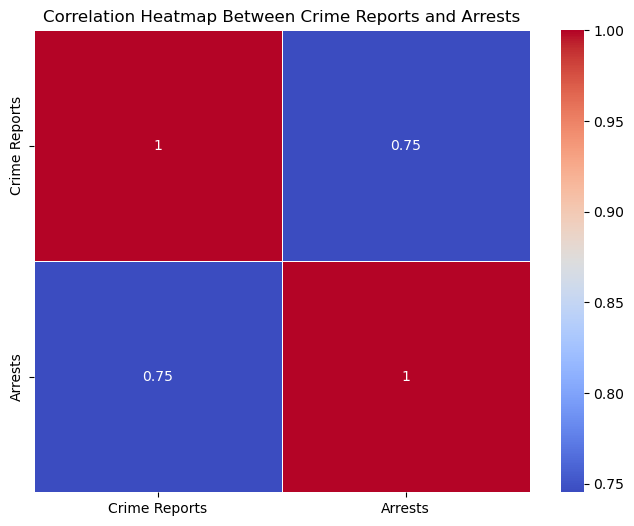

In [21]:
# Correlation between Crime Reports and Arrests
correlation_data = merged_data[['Crime Reports', 'Arrests']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Crime Reports and Arrests')
plt.savefig('Correlation heatmap')
plt.show()

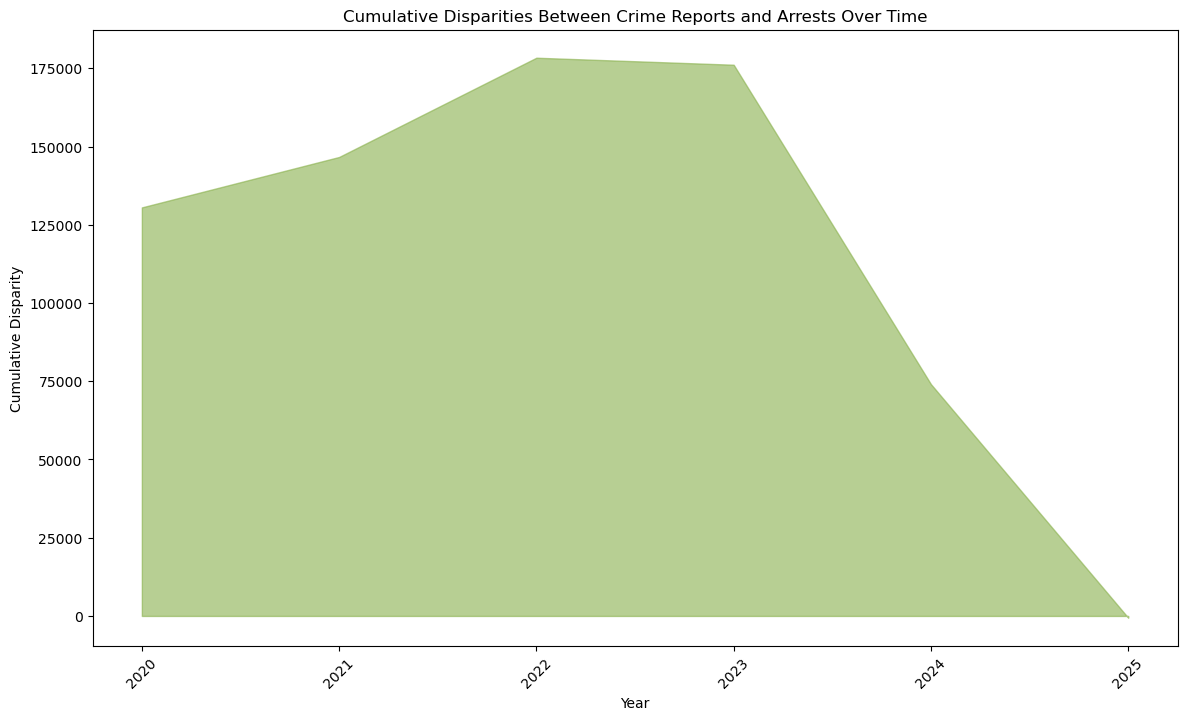

In [22]:
# Cumulative Disparities Over Time
disparity_trend = crime_trend.copy()
disparity_trend['Disparity'] = disparity_trend['Crime Reports'] - arrest_trend['Arrests']
disparity_trend.fillna(0, inplace=True)

plt.figure(figsize=(14, 8))
plt.fill_between(disparity_trend['Date Rptd'].astype(str), disparity_trend['Disparity'], color='#88B04B', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Cumulative Disparity')
plt.title('Cumulative Disparities Between Crime Reports and Arrests Over Time')
plt.xticks(rotation=45)
plt.savefig('Cumulative')
plt.show()
